In [ ]:
import ephem
import pandas as pd
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt


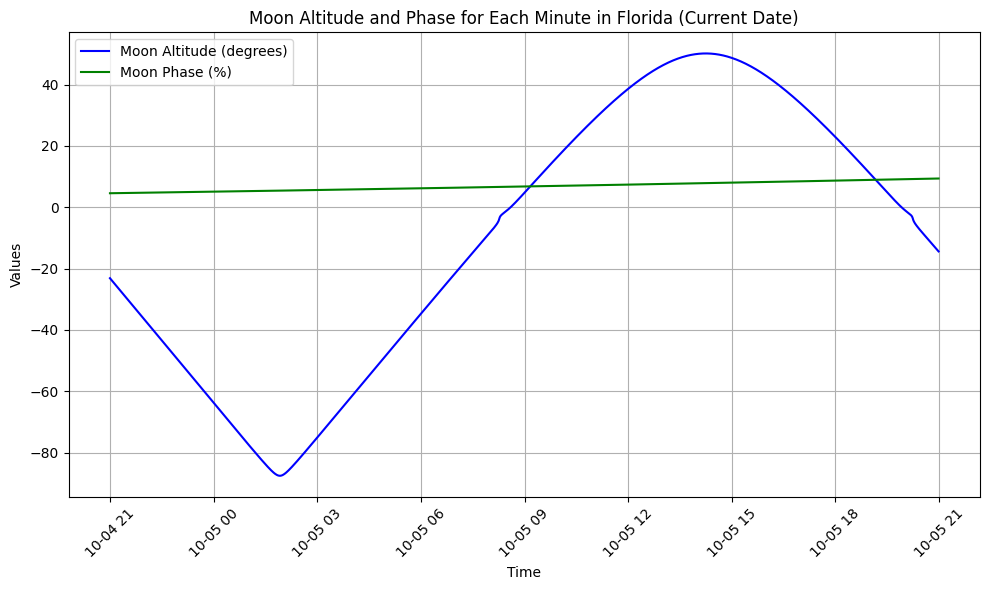

Data exported to './data/moonlight.csv'


In [7]:
def moon_altitude_phase(lat, lon, date_time):
    # Create an observer object
    observer = ephem.Observer()
    
    # Set the observer's latitude and longitude
    observer.lat = str(lat)
    observer.lon = str(lon)
    
    # Set the date and time for the observer
    observer.date = date_time

    # Create a Moon object and compute its position from the observer's location
    moon = ephem.Moon()
    moon.compute(observer)
    
    # Get the altitude of the moon in degrees
    moon_altitude = moon.alt  # altitude in radians
    moon_altitude_degrees = float(moon_altitude) * 180.0 / 3.141592653589793  # convert to degrees

    # Get the moon phase as a percentage (0 = New Moon, 100 = Full Moon)
    moon_phase = moon.phase

    # Return the altitude in degrees and phase as percentage
    return moon_altitude_degrees, moon_phase

# Function to collect data
def collect_moon_data():
    # Define location (Florida, USA)
    latitude =  19.71361111111111   # latitude for Milwaukee Trench
    longitude = -67.31083333333333  # longitude for Milwaukee Trench

    # Define Florida's timezone
    florida_tz = pytz.timezone('America/New_York')

    # Get the current date and time in Florida timezone
    now_florida = datetime.now(florida_tz)
    
    # Set the start of the current hour
    current_hour = now_florida.replace(minute=0, second=0, microsecond=0)

    # List to store data
    data = []

    # Collect Moon data for every minute of the current day
    for minute_offset in range(24 * 60):  # 24 hours * 60 minutes
        # Calculate the minute (current_hour + minute_offset)
        query_time = current_hour + timedelta(minutes=minute_offset)
        query_time_utc = query_time.astimezone(pytz.utc)  # convert to UTC for ephem
        
        # Get Moon altitude and phase
        altitude, phase = moon_altitude_phase(latitude, longitude, query_time_utc)
        
        # Append the data to the list
        data.append({
            'Timestamp': query_time,
            'Moon Altitude (degrees)': altitude,
            'Moon Phase (%)': phase
        })
    
    # Convert list to DataFrame
    df = pd.DataFrame(data)
    return df

# Collect the data
df = collect_moon_data()

# Plot Moon Altitude and Phase
plt.figure(figsize=(10,6))

# Plot Moon Altitude
plt.plot(df['Timestamp'], df['Moon Altitude (degrees)'], label='Moon Altitude (degrees)', color='blue')

# Plot Moon Phase
plt.plot(df['Timestamp'], df['Moon Phase (%)'], label='Moon Phase (%)', color='green')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Moon Altitude and Phase for Each Minute in Florida (Current Date)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Export DataFrame to CSV
df.to_csv('./data/moonlight.csv', index=False)
print(f"Data exported to './data/moonlight.csv'")
